# Your name: Adrien LOPEZ

# Gaussian mixture model: EM vs VI


We consider two algorithms for inference in the Gaussian mixture model: expectation maximization (EM) and mean-field variational inference (VI).

In both cases, we deal with a mixture of $K$ real-valued normalized Gaussian random variables. We assume that $K$ is known and for simplicity that the variances of the Gaussian distributions are all equal to one.There are $n$ observations denoted by $x=(x_1,\dots, x_n)\in \mathbb{R}^n$. The weights of the mixture as well as the mean of each Gaussian distribution is not known and need to be estimated.

Note: you can read Sections 1 and 2 independently (as a result some notations are repeated).

## 1. Expectation Maximization

**setting:**
- $\mu=(\mu_1,\dots, \mu_K)\in \mathbb{R}^K$
- $p(c=k) = \pi_k$ with $\pi =(\pi_1,\dots, \pi_K)$ and $\sum_k \pi_k =1$, $\pi_k\geq 0$
- parameter $\theta=(\mu,\pi)$
- Gaussian distribution with normalized variance and mean $m$: $f_m(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}(x-m)^2 \right)$.
- Gaussian mixture model: for $x=(x_1,\dots, x_n)\in \mathbb{R}^n$ and $c = (c_1,\dots c_n)\in [K]^n$, we have $p_{\theta}(x,c) = \prod_{i=1}^n \pi_{c_i} f_{\mu_{c_i}}(x_i)$

Likelihood (we observe only $x$ and not the classes given by $c$)
\begin{align*}
\ell(\theta) &= \ln p_\theta(x) = \ln \sum_{c\in [K]^n} p_\theta(x,c)
\end{align*}
is not tractable because the time complexity for evaluating the sum is $O(K^n)$.

**ELBO** (Evidence Lower BOund)
\begin{align*}
\ell(\theta) &= \sum_{c\in [K]^n} q(c) \ln  p_\theta(x)\\
&= \sum_{c\in [K]^n} q(c) \ln \frac{p_\theta(x,c)q(c)}{p_{\theta}(c|x)q(c)}\\
&= \sum_{c\in [K]^n} q(c) \ln \frac{p_\theta(x,c)}{q(c)} + \sum_{c\in [K]^n} q(c) \ln \frac{q(c)}{p_{\theta}(c|x)}\\ 
&= \text{ELBO}(q)+\text{KL}\left(q(c)\| p_\theta(c|x)\right)
%&= \sum_{c\in [K]^n} q(c|x) \ln p_\theta(x,c) + H(q(c|x))
%&\geq \sum_{c\in [K]^n} q(c|x) \ln p_\theta(x,c) 
\end{align*}

Note that for $q(c) = p_{\theta}(c|x)$, we get $\text{KL}\left(p_{\theta}(c|x)\| p_\theta(c|x)\right)=0$, so that $\text{ELBO}(p_{\theta}(c|x)) =\ell(\theta)$.
Now for an estimate $\theta_t$ of the parameter, we take $q(c) = p_{\theta_t}(c|x)$ and define
\begin{align*}
\ell(\theta|\theta_t)\stackrel{\Delta}{=} \sum_{c\in [K]^n} p_{\theta_t}(c|x) \ln \frac{p_\theta(x,c)}{p_{\theta_t}(c|x)}, %= \text{ELBO}( p_{\theta_t}(c|x)),
\end{align*}
so that by previous argument, we have
\begin{align*}
\ell(\theta|\theta_t) = \ell(\theta)-\text{KL}\left(p_{\theta_t}(c|x)\| p_\theta(c|x)\right),
\end{align*}
in particular, we see that $\ell(\theta|\theta_t) \leq  \ell(\theta)$ and $\ell(\theta_t|\theta_t) = \ell(\theta_t)$.

**EM algorithm:**
- E-step: compute $p_{\theta_t}(c|x)$
- M-step: maximize in $\theta$, $\theta_{t+1}=\arg\max_{\theta}\ell(\theta|\theta_t)=\arg\max_{\theta}\sum_{c\in [K]^n} p_{\theta_t}(c|x) \ln {p_\theta(x,c)}$

**Properties of EM:** the sequence of log-likelihoods $(\ell(\theta_t))_{t\geq 0}$ is non-decreasing and thus converges.

The proof is easy: note that by applying the equality above for $\theta=\theta_{t+1}$, we get
\begin{align*}
\ell(\theta_{t+1}|\theta_t) = \ell(\theta_{t+1})-\text{KL}\left(p_{\theta_t}(c|x)\| p_{\theta_{t+1}}(c|x)\right)\leq \ell(\theta_{t+1}),
\end{align*}
so that we have
\begin{align*}
\ell(\theta_{t+1}) \geq \ell(\theta_{t+1}|\theta_t) \geq \ell(\theta_{t}|\theta_t) = \ell(\theta_t)
\end{align*}

We now need to derive the EM algorithm for the GMM.

**Question 1**

Show that for a parameter $\theta =(\mu, \pi)$ and $x\in \mathbb{R}^n$, we have:
\begin{align*}
p_{ik}(\theta,x) &\stackrel{\Delta}{=} p_{\theta}(c_i=k|x_i)\\
& = \frac{\pi_k(\theta) \exp\left( -\frac{1}{2}(x_i-\mu_k(\theta))^2\right)}{\sum_\ell \pi_\ell(\theta) \exp\left( -\frac{1}{2}(x_i-\mu_\ell(\theta))^2\right)}
\end{align*}
with a slight abuse of notation where $\theta= (\mu(\theta),\pi(\theta))$.

**Answer 1**
Using the deifnition of a conditional probability and by calculating the marginal:
$$
p_{\theta}(x_i,c_i=k) = \pi_kf_{\mu_k}(x_i)
$$
I get:
\begin{align*}
p_{ik}(\theta,x) &\stackrel{\Delta}{=} p_{\theta}(c_i=k|x_i)\\
&= \frac{p_{\theta}(x_i,c_i=k)}{p_{\theta}(x_i)}\\
&= \frac{p_{\theta}(x_i,c_i=k)}{\sum_l p_{\theta}(x_i,c_i=l)}\\
&= \frac{\pi_kf_{\mu_k}(x_i)}{\sum_l \pi_lf_{\mu_l}(x_i)} \\
p_{ik}(\theta,x) &= \frac{\pi_k(\theta) \exp\left( -\frac{1}{2}(x_i-\mu_k(\theta))^2\right)}{\sum_l \pi_l(\theta) \exp\left( -\frac{1}{2}(x_i-\mu_l(\theta))^2\right)}
\end{align*}

**Question 2**

We define
\begin{align*}
n_{k}(\theta, x) = \sum_{i=1}^n p_{ik}(\theta,x).
\end{align*}

Derive the **EM for Gaussian mixture**
- **Expectation** given $\theta_t$ and the samples $x=(x_1,\dots, x_n)$, compute for all $i\in [n]$ and $k\in [K]$:
\begin{align*}
p_{ik}(\theta_t,x) & = ???
\end{align*}
- **Maximization** given $\theta_t$ and the samples $x=(x_1,\dots, x_n)$, the parameter $\theta_{t+1}$ maximizing $\ell(\theta|\theta_t)$ is given by
\begin{align*}
\pi_k(\theta_{t+1}) &= ???\\
\mu_k(\theta_{t+1}) &= ???
\end{align*}

**Answer 2**

I get:

- **Expectation** For the first step, I need:
$$
p_{\theta_t}(c|x) = \frac{p_{\theta_t}(c,x) }{\sum_{c'\in K^n} p_{\theta_t}(c',x) }
$$
It is best to write it as:
$$
p_{\theta_t}(c|x) = \prod_{i=1}^np_{i,c_i}(\theta,x)
$$
The two expression are both proportional from the expression of $p_{\theta_t}(c,x)$, and potentially differ by a normalizing factor. However, by definition:
$$
\sum_{c\in K^n} p_{\theta_t}(c|x) = 1
$$
as well as:
$$
\sum_{k=1}^K p_{ik}(\theta,x) = 1
$$
so
\begin{align*}
\sum_{c\in K^n} \prod_{i=1}^np_{i,c_i}(\theta,x) &= \prod_{i=1}^n\left(\sum_{k=1}^K p_{ik}(\theta,x)\right) \\
&= 1
\end{align*}
Thus, both sum to $1$ over $c\in K^n$ and have the same normalization. They are equal.

- **Maximization** I want to find the maximizing $\theta$ of:
$$
\sum_{c\in [K]^n} p_{\theta_t}(c|x) \ln p_\theta(x,c)
$$
which, up to a $\theta$ independent term amounts to maximizing:
\begin{align*}
\hat \ell (\theta|\theta_t) &:= \sum_{c\in [K]^n} \left[\prod_{i=1}^np_{i,c_i}(\theta_t,x)\right] \sum_{j=1}^n\left[\ln\pi_{c_j}(\theta)-\frac{1}{2}\mu_{c_j}(\theta)^2+x_j\mu_{c_j}(\theta)\right] \\
&=  \sum_{k=1}^K\sum_{j=1}^n\sum_{c\in [K]^n,c_j=k} \prod_{i=1}^np_{i,c_i}(\theta_t,x)\left[\ln\pi_{c_j}(\theta)-\frac{1}{2}\mu_{c_j}(\theta)^2+x_j\mu_{c_j}(\theta)\right] \\
&=  \sum_{k=1}^K\sum_{j=1}^np_{ik}(\theta_t,x)\left[\ln\pi_k(\theta)-\frac{1}{2}\mu_k(\theta)^2+x_j\mu_k(\theta)\right]\sum_{c\in [K]^{n-1}} \prod_{i\neq j}^np_{i,c_i}(\theta_t,x) \\
&=  \sum_{k=1}^K\sum_{j=1}^np_{ik}(\theta_t,x)\left[\ln\pi_k(\theta)-\frac{1}{2}\mu_k(\theta)^2+x_j\mu_k(\theta)\right]\prod_{i\neq j}\left(\sum_{k=1}^Kp_{ik}(\theta_t,x)\right) \\
&=  \sum_{k=1}^K\sum_{j=1}^np_{ik}(\theta_t,x)\left[\ln\pi_k(\theta)-\frac{1}{2}\mu_k(\theta)^2+x_j\mu_k(\theta)\right]\\
\hat \ell (\theta|\theta_t) &= \sum_{k=1}^K n_k(\theta_t,x)\left[\ln\pi_k(\theta)-\frac{1}{2}\mu_k(\theta)^2+\mu_k(\theta)\overline x_k(\theta_t,x)\right]
\end{align*}
where I used the shorthand:
$$
\overline x_k(\theta_t,x) := \frac{1}{n_k(\theta_t,x)}\sum_{j=1}^n x_j p_{jk}(\theta_t,x)
$$

Optimizing $\pi(\theta)$ under the constraint $\sum_{k=1}^K\pi_k(\theta) = 1$ (with a Lagrange multiplier) gives:
$$
\pi_k(\theta_{t+1}) \propto  n_k(\theta_t,x)
$$
with a common prefactor (Lagrange multiplier), so setting:
$$
n(\theta_t,x) := \sum_k n_k(\theta_t,x)
$$
I get:
$$
\pi_k(\theta_{t+1})  = \frac{n_k(\theta_t,x)}{n(\theta_t,x)}
$$
This is nothing else but the empirical frequency.

Optimizing $\mu(\theta)$ gives:
$$
\mu_k(\theta_{t+1})  = \overline x_k(\theta_t,x)
$$
This is nothing else but the empirical average.

The updated paramters converge to ones satisfying the self-consistent condition:
\begin{align*}
\pi_k  &= \frac{n_k(x)}{n(x)} &
\mu_k  &= \overline x_k(x)
\end{align*}

**Question 3**

Compute $\ell(\theta_t)=\ell(\theta_t|\theta_t)$.

**Answer 3**

I could use the previous calculations, but since I discarded $\theta$ indepedent terms, it would need some work. It is cleaner to start from the beginning:
\begin{align*}
p_\theta(x) &= \sum_{c\in K^n}p_\theta(x,c) \\
&= \sum_{c\in K^n}\prod_{i=1}^n \pi_{c_i}f_{\mu_i}(x_i) \\
&= \prod_{i=1}^n\left(\sum_{k=1}^K\pi_kf_k(x_i)\right)
\end{align*}
so:
\begin{align*}
\ell(\theta) &= \ln p_\theta(x) \\
&= \sum_{i=1}^n\ln\left(\sum_{k=1}^K\pi_kf_k(x_i)\right) \\
\ell(\theta) &= \sum_{i=1}^n\ln\left(\sum_{k=1}^K\pi_ke^{-(x_i-\mu_k)^2/2}\right) -\frac{n}{2}\ln(2\pi)\\
\end{align*}

From this calculation, the original complexity argument falls short. Indeed, after appropriately massaging the expression, the naive complexity falls from $K^n$ to simply $Kn$.

The true advantage of the method is to get a tractable set of equations. Indeed, optimizing directly $\ell(\theta)$ would give a system of equations coupling $\pi$ and $\mu$:
\begin{align*}
1 &= \sum_{k=1}^K \pi_k\\
\lambda &= \sum_{i=1}^n\frac{e^{-(x_i-\mu_k)^2/2}}{\sum_{l=1}^K\pi_le^{-(x_i-\mu_l)^2/2}} \\
0 &= \sum_{i=1}^n\frac{\pi_k e^{-(x_i-\mu_k)^2/2}(\mu_k-x_i)}{\sum_{l=1}^K\pi_le^{-(x_i-\mu_l)^2/2}}
\end{align*}
Since there is no closed form solution, it has to be solved numerically. The EM method is a heuristic to get an approximate result, but does not guarantee to give a rigourous solution. Indeed, the true equations are different from the self consistent equations. This is not dramatic, since the goal is to estimate the parameters, which maximizing the empirical loss would not achieve exactly. In fact, maximizing it rigourously could lead to overfitting, as the true parameters would not generically optimize the empirical loss. Hopefully, this new estimator would have similar desirable statistical properties, like converge to the correct parameters when $n\to\infty$ for example.

## 2. Mean-field Variational Inference

**setting:**
- $\mu=(\mu_1,\dots, \mu_K)\in \mathbb{R}^K$ with prior $p(\mu_k)=\mathcal{N}(\mu_k|0,\sigma^2)$ and $p(\mu)= \prod_k p(\mu_k)$.
- $p(c=k) = \pi_k$ with $\pi =(\pi_1,\dots, \pi_K)$ and $\sum_k \pi_k =1$, $\pi_k\geq 0$ with a Dirichlet prior $p(\pi)=C(\alpha)\prod_{k=1}^K\pi_k^{\alpha-1}$, with $C(\alpha) = \frac{\Gamma(K\alpha)}{\Gamma(\alpha)^K}$.
- Gaussian distribution with normalized variance and mean $m$: $f_m(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}(x-m)^2 \right)$.
- Gaussian mixture: for $x=(x_1,\dots, x_n)\in \mathbb{R}^n$ and $c = (c_1,\dots c_n)\in [K]^n$, we have $p(x,c,\mu,\pi) = p(\mu)p(\pi)\prod_{i=1}^n \pi_{c_i} f_{\mu_{c_i}}(x_i)$

Hence, the evidence is
\begin{align*}
p(x) = \sum_{c\in [K]^n} \int_{\mu,\pi} p(\mu)p(\pi)\prod_{i=1}^n \pi_{c_i} f_{\mu_{c_i}}(x_i) d\mu d\pi = \int_{\mu,\pi} p(\mu)p(\pi)\prod_{i=1}^n\sum_{c_i\in[K]} \pi_{c_i} f_{\mu_{c_i}}(x_i) d\mu d\pi
\end{align*}

**ELBO**


\begin{align*}
\ln p(x) &= \sum_c\int_{\mu,\pi} q(\mu,\pi,c)\ln \frac{p(x,c,\mu,\pi)}{p(c,\mu,\pi|x)} d\mu d\pi\\
&= \sum_c\int_{\mu,\pi} q(\mu,\pi,c)\ln \frac{p(x,c,\mu,\pi)}{q(\mu,\pi,c)}-\sum_c\int_{\mu,\pi} q(\mu, \pi,c)\ln \frac{p(c,\mu, \pi|x)}{q(\mu, \pi,c)}\\
&= \text{ELBO}(q)+\text{KL}\left( q(\mu,\pi,c)\| p(c,\mu,\pi|x)\right)
\end{align*}

**Maximizing ELBO with a mean-field distribution**

We are considering now factorized distributions for $q$:
\begin{align*}
q(\mu,\pi,c) = q(\mu,\pi)q(c).
\end{align*}

We have for the factor $q(\mu,\pi)$:
\begin{align*}
\text{ELBO}(q) &= \int_{\mu, \pi} q(\mu,\pi)\sum_{c\in [K]^n} q(c)\ln p(x, c,\mu,\pi)d\mu d\pi +H(q(\mu,\pi))+H(q(c))\\
&=\int_{\mu,\pi} q(\mu,\pi)\mathbb{E}_{q(c)}\left[\ln p(x, c,\mu,\pi)\right]d\mu d\pi-\int_{\mu,\pi} q(\mu,\pi)\ln q(\mu,\pi)d\mu d\pi +\text{cst}
\end{align*}

**Question 4** 

When $q(c)$ is fixed (we denote $\varphi_{i}(k) = q(c_i=k)$ the $i$-th marginal of $q$), find the distirbution $q^*(\mu,\pi)$ maximizing ELBO.
(Hint: if you are not familiar with the Dirichlet distribution, have a look at its [definition](https://en.wikipedia.org/wiki/Dirichlet_distribution))

**Answer 4**

I can massage the final expression into a KL divergence form (with the same $q$ independent term):
$$
\text{ELBO}(q) = -\int q(\mu,\pi)\ln\frac{q(\mu,\pi)}{\exp\left(\mathbb{E}_{q(c)}\left[\ln p(x, c,\mu,\pi)\right]\right)}d\mu d\pi +cst
$$
so by minimizing the KL divergence:
$$
q^*(\mu,\pi) \propto \exp\left(\mathbb{E}_{q(c)}\left[\ln p(x, c,\mu,\pi)\right]\right)
$$
up to a $\mu,\pi$ independent normalization factor. Calculating
\begin{align*}
\exp\left(\mathbb{E}_{q(c)}\left[\ln p(x, c,\mu,\pi)\right]\right) &= \exp\left(\sum_{c\in K^n}q(c)\ln p(x, c,\mu,\pi)\right) \\
&= \exp\left(\ln p(\mu)+\ln p(\pi)+\sum_{c\in K^n}q(c)\sum_{i=1}^n\left(\ln\pi_{c_i}+\ln f_{\mu_{c_i}}(x_i)\right)\right)\\
&\propto p(\mu)p(\pi)\exp\left(\sum_{k=1}^K\sum_{i=1}^n\sum_{c\in K^n,c_i=k}q(c)\left(\ln\pi_k-\frac{1}{2}\mu_k^2+\mu_kx_i\right)\right)\\
&\propto p(\mu) p(\pi)\exp\left(\sum_{k=1}^K\overline q_k\left(\ln\pi_k-\frac{1}{2}\mu_k^2+\mu_k\overline x_k\right)\right)\\
&\propto \prod_{k=1}^K \pi_k^{\alpha+\overline q_k-1}\exp\left(-\frac{1}{2}(\overline q_k+\sigma^{-2})\left(\mu_k-\frac{\overline q_k\overline x_k}{\overline q_k+\sigma^{-2}}\right)^2\right)
\end{align*}

where, I used:
$$
\phi_i(k)=\sum_{c\in K^n,c_i=k}q(c)
$$
and the shorthands:
\begin{align*}
\overline q_k &= \sum_{i=1}^n \phi_i(k) &
\overline x_k &= \frac{1}{\overline q_k}\sum_{i=1}^n x_i \phi_i(k)
\end{align*}
Thus
\begin{align*}
q^*(\mu,\pi) &= q^*(\mu)q^*(\pi) \\
q^*(\mu) &\sim \mathcal N\left(\frac{\overline q \sigma^2}{\overline q\sigma^2+1}\overline x,\frac{\sigma^2}{\overline q\sigma^2+1}\right) &
q^*(\pi) &\sim \text{Dir}(\alpha+\overline q)
\end{align*}
This motivates the choice of the prior as they are conjugate to the posterior. In particular, the optimization decouples (makse independent) $\mu,\pi$, which become diagonal normal and Dirichlet.

**Question 5**

Similarly maximizing ELBO with $q(\mu,\pi)$ fixed, give the distribution $q^*(c)$. (Hint: the log moment of the [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution) are given by the [digamma function](https://en.wikipedia.org/wiki/Digamma_function)).

**Answer 5**

The roles are symmetric, so the same method applies:
$$
\text{ELBO}(q) = -\sum_{c\in K^n} q(c)\ln\frac{q(c)}{\exp\left(\mathbb{E}_{q(\mu,\pi)}\left[\ln p(x, c,\mu,\pi)\right]\right)} +cst
$$
so by minimizing the KL divergence:
$$
q^*(c) \propto \exp\left(\mathbb{E}_{q(\mu,\pi)}\left[\ln p(x, c,\mu,\pi)\right]\right)
$$
up to a $c$ independent normalization factor. Calculating
\begin{align*}
q^*(c) &\propto \exp\left(\int d\mu d\pi q(\mu,\pi)\ln p(x, c,\mu,\pi)\right) \\
&\propto \exp\left[\int d\mu d\pi q(\mu,\pi)\left(\ln p(\mu)+\ln p(\pi)+\sum_{i=1}^n\left(\ln\pi_{c_i}+\ln f_{\mu_{c_i}}(x_i)\right)\right)\right]\\
&\propto \exp\left[\sum_{i=1}^n\int d\mu d\pi q(\mu,\pi)\left(\ln\pi_{c_i}-\frac{1}{2}(\mu_{c_i}-x_i)^2\right)\right]\\
&= \prod_{i=1}^n \phi_i(c_i)
\end{align*}

where, I identified:
\begin{align*}
\phi_i(k) &\propto \exp\left[\int d\mu_k d\pi_k q_k(\mu_k,\pi_k)\left(\ln\pi_k-\frac{1}{2}(\mu_k-x_i)^2\right)\right] \\
&\propto \exp\left[\mathbb E_{q_k(\pi_k)}(\ln\pi_k)-\frac{1}{2}\mathbb E_{q_k(\mu_k)}((\mu_k-x_i)^2)\right]
\end{align*}
with $q_k(\mu_k,\pi_k),q_k(\mu_k),q_k(\pi_k)$ the marginals of $q$. The result is up to a $k$ independent factor. This normalization factor is determined so that the last equation is a rigourous equality. This is achieved by the normalisation of the marginals for all $i=1...n$:
$$
\sum_{k=1}^K \phi_i(k) = 1
$$

Without knowing the marginals this is as far as I can go. However, using the previous question, and it will be fully justified later, I can assume:
\begin{align*}
q(\mu,\pi) &= q(\mu)q(\pi) \\
q(\mu) &\sim \mathcal N\left((m_k)_{k\in [K]},(v_k)_{k\in [K]}\right) &
q(\pi) &\sim \text{Dir}((\beta_k)_{k\in [K]})
\end{align*}
Taking the marginals:
\begin{align*}
q_k(\mu_k,\pi_k) &= q_k(\mu_k)q_k(\pi_k) \\
q_k(\mu) &\sim \mathcal N\left(m_k,v_k\right) &
q_k(\pi_k) &\sim \Beta(\beta_k,\beta_0-v_k)
\end{align*}
using the same notation $\beta_0 = \sum_{k=1}^K\beta_k$, and the fact that the marginal of a Dirichlet distribution is a beta distribution. I get:
\begin{align*}
\phi_i(k) &\propto \exp\left[\int d\mu_k \frac{e^{-(\mu_k-m_k)^2/2v_k}}{\sqrt{2\pi v_k}}\left(-\frac{1}{2}(\mu_k-x_i)^2\right)\right]\exp\left[\int d\pi_k \frac{\pi_k^{\beta_k-1}(1-\pi_k)^{\beta_0-\beta_k-1}}{\Beta(\beta_k,\beta_0-\beta_k)}\ln\pi_k\right] \\
\phi_i(k) &\propto \exp\left( -\frac{1}{2}(v_k+(m_k-x_i)^2)\right)e^{\psi(\beta_k)-\psi(\beta_0)} \\
\phi_i(k) &= \frac{1}{Z_i} \exp\left( -\frac{1}{2}(v_k+(m_k-x_i)^2)+\psi(\beta_k)\right) \\
Z_i &= \sum_{k=1}^K \exp\left( -\frac{1}{2}(v_k+(m_k-x_i)^2)+\psi(\beta_k)\right)
\end{align*}
where I have used the formula for the geometric mean of a beta distribution.

The optimization decouples the $c_i$, which will be useful later.

**Question 6**

Derive the mean-fild VI algorithm.

**Answer 6**

The optimal distribution $q$ under the ansatz form is therefore given by the self consistent equations:

\begin{align*}
q(c) &= q^*(c)[q(\mu,\pi)] \\
q(\mu,\pi) &= q^*(\mu,\pi)[q(c)] \\
\end{align*}

This coupled set of functional equations does not have a closed form solutions, they need to be solved numerically. The natural method is by a self consistent loop. Iteratively, I update:

\begin{align*}
q_{t+1}(c) &= q^*(c)[q_t(\mu,\pi)] & q_{t+1}(\mu,\pi) &= q_t(\mu,\pi)\\
q_{t+2}(c) &= q_{t+1}(c) & q_{t+2}(\mu,\pi) &= q^*(\mu,\pi)[q_{t+1}(c)]\\
\end{align*}

Each of the two substeps of the loop does not increase the ELBO, so it will converge to a certain value. This limit value is a critical point of the ELBO, but not necessarily its global maximum.

Since the priors were carefully chosen, I do not need a lot of data to keep track of $q(c),q(\mu,\pi)$. For $q(c)$, I do not need the full $K^n$ values of $q(c)$, but rather the $Kn$ values of its marginals $\phi_i(k)$ since the $c_i$ are independent. Furthermore, for $q(\mu,\pi)$, it will always be of the form:
\begin{align*}
q(\mu) &\sim \mathcal N\left((m_k)_{k\in [K]},(v_k)_{k\in [K]}\right) \\
q(\pi) &\sim \text{Dir}((\beta_k)_{k\in [K]})
\end{align*}
so I need to store in memory $3K$ numbers: the $m_k$, $v_k$ and $\beta_k$. The storage is therefore reasonable and the computational complexity is reasonable as well from the previous formulas. Note that unlike the EM method, which keeps track only of $2K$ parameters, $\mu,\pi$, there is an additional $K$ number of them.

The loop consists of two steps. The first one is the $q(c)$ optimization which gives the update rule ($Kn$ affectations, $n$ times sums of $K$ terms to do):
$$
\phi_i(k) \to \frac{1}{Z_i} \exp\left( -\frac{1}{2}(v_k+(m_k-x_i)^2)+\psi(\beta_k)\right)
$$
with:
$$
Z_i = \sum_{k=1}^K \exp\left( -\frac{1}{2}(v_k+(m_k-x_i)^2)+\psi(\beta_k)\right)
$$

The second one is the $q(\mu,\pi)$ optimization which  gives the update rule ($3K$ affectations, $2k$ times sums of $n$ terms):
\begin{align*}
m_k &\to \frac{\overline q_k \sigma^2}{\overline q_k\sigma^2+1}\overline x_k &
v_k &\to \frac{\sigma^2}{\overline q_k\sigma^2+1} &
\beta_k &\to \alpha+\overline q_k
\end{align*}
with:
\begin{align*}
\overline q_k &= \sum_{i=1}^n \phi_i(k) &
\overline x_k &= \frac{1}{\overline q_k}\sum_{i=1}^n x_i \phi_i(k)
\end{align*}

Another more natural candidate is to consider the posterior of the model parameters $\mu,\pi$ given the observations. If they start with the same prior, each observation generates a mixture of $K$ distributions considered in the algorithm. The numbers of parameters therefore increases as $3K^n$, i.e. exponentially. Furthermore, the parameters $\mu,\pi$ couple more and more. Finally, the poseterior predictive will not be a mixture of $K$ gaussians, but rather the of $K^n$ gaussians, so in some sense a lot of information is redundant since the true distribution is a mixture of $K$ gaussians. Thus the VI agorithm is a clear improvement.

**Question 7**

To compute the ELBO,  the following decomposition
\begin{align*}
\text{ELBO}(q) = \underbrace{\mathbb{E}_{q(\mu)q(\pi)}\ln p(\mu)p(\pi)}_{A}+\underbrace{\mathbb{E}_{q(\mu)q(\pi)q(c)}\ln \prod_{i=1}^n\pi_{c_i}f_{\mu_{c_i}}(x_i)}_{B} +H(q(\mu))+H(q(\pi))+H(q(c)).
\end{align*}

**Answer 7**

Calculating each term:
\begin{align*}
H(q(\mu)) &= -\int d^K\mu \prod_{k=1}^K\frac{e^{-(\mu_k-m_k)^2/2v_k}}{\sqrt{2\pi v_k}}\ln\prod_{k=1}^K\frac{e^{-(\mu_k-m_k)^2/2v_k}}{\sqrt{2\pi v_k}} \\
  &=-\sum_{k=1}^K\int d\mu_k \frac{e^{-(\mu_k-m_k)^2/2v_k}}{\sqrt{2\pi v_k}}\ln \frac{e^{-(\mu_k-m_k)^2/2v_k}}{\sqrt{2\pi v_k}} \\
  &= \sum_{k=1}^K\frac{1+\ln(2\pi v_k)}{2} \\
H(q(\mu))  &= \frac{K}{2}+\sum_{k=1}^K\frac{\ln(2\pi v_k)}{2} \\
H(q(\pi)) &= -\int d^K\pi \frac{1}{\Beta(\beta)}\prod_{k=1}^K\pi_k^{\beta_k-1}\ln\left(\frac{1}{\Beta(\beta)}\prod_{k=1}^K\pi_k^{\beta_k-1}\right) \\
  &= \ln \Beta(\beta)-\sum_{k=1}^K\int d\pi_k \frac{\pi_k^{\beta_k-1}(1-\pi_k)^{\beta_0-\beta_k-1}}{\Beta(\beta_k,\beta_0-\beta_k)}\ln \pi_k^{\beta_k-1} \\
  &= \ln \Beta(\beta)-\sum_{k=1}^K(\beta_k-1)(\psi(\beta_k)-\psi(\beta_0)) \\
H(q(\pi))  &= \ln \Beta(\beta)+(\beta_0-K)\psi(\beta_0)-\sum_{k=1}^K(\beta_k-1)\psi(\beta_k) \\
H(q(c)) &= -\sum_{c\in K^n}\prod_{i=1}^n\phi_i(c_i)\ln \prod_{i=1}^n\phi_i(c_i) \\
H(q(c)) &= -\sum_{i=1}^n\sum_{k=1}^K\phi_i(k)\ln\phi_i(k)\\
A &= \int d\mu d\pi q(\mu)q(\pi)\ln(p(\mu)p(\pi)) \\
  &= -H(q(\mu),p(\mu))-H(q(\pi),p(\pi)) \\
  &= \ln C(\alpha)+\sum_{k=1}^K\int d\mu_k \frac{e^{-(\mu_k-m_k)^2/2v_k}}{\sqrt{2\pi v_k}}\ln \frac{e^{-\mu_k^2/2\sigma^2}}{\sqrt{2\pi \sigma^2}}+\int d\pi_k \frac{\pi_k^{\beta_k-1}(1-\pi_k)^{\beta_0-\beta_k-1}}{\Beta(\beta_k,\beta_0-\beta_k)}\ln \pi_k^{\alpha-1} \\
  &= \ln C(\alpha)-\sum_{k=1}^K\frac{m_k^2+v_k+\sigma^2\ln(2\pi\sigma^2)}{2\sigma^2}-(\alpha-1)(\psi(\beta_k)-\psi(\beta_0)) \\
A  &= \ln C(\alpha)-K\left(\frac{\ln(2\pi \sigma^2)}{2}+(\alpha-1)\psi(\beta_0)\right)-\sum_{k=1}^K\frac{m_k^2+v_k}{2\sigma^2}-(\alpha-1)\psi(\beta_k)\\
B &= \int d\mu d\pi \sum_{c\in K^n}q(\mu)q(\pi)q(c)\ln\prod_{i=1}^n\pi_{c_i}f_{\mu_{c_i}}(x_i) \\
  &= \sum_{i=1}^n \int d\mu \sum_{c\in K^n}\prod_{j=1}^n\phi_j(c_j)\frac{e^{-(\mu_{c_j}-m_{c_j})^2/2v_{c_j}}}{\sqrt{2\pi v_{c_j}}}\ln f_{\mu_{c_i}}(x_i)+\int d\pi \sum_{c\in K^n} \frac{1}{\Beta(\beta)}\prod_{j=1}^n\phi_j(c_j)\pi_{c_j}^{\beta_{c_j}-1}\ln\pi_{c_i} \\
  &= \sum_{i=1}^n \sum_{k=1}^K\left(\int d\mu_k\phi_i(k)\frac{e^{-(\mu_{k}-m_k)^2/2v_k}}{\sqrt{2\pi v_k}}\ln f_{\mu_k}(x_i) +\int d\pi_k \phi_i(k)\frac{\pi_k^{\beta_k-1}(1-\pi_k)^{\beta_0-\beta_k-1}}{\Beta(\beta_k,\beta_0-\beta_k)}\ln\pi_k\right) \\
  &= \sum_{i=1}^n \sum_{k=1}^K\phi_i(k)\left(-\frac{(m_k-x_i)^2+v_k+\ln(2\pi)}{2}+\psi(\beta_k)-\psi(\beta_0)\right) \\
B  &=  -n\left(\frac{\ln(2\pi)}{2}+\psi(\beta_0)\right)+\sum_{k=1}^K \overline q_k\left(-\frac{m_k^2-2m_k\overline x_k+\overline {x^2}_k+v_k}{2}+\psi(\beta_k)\right)
\end{align*}
where I used the standard notation:
$$
\Beta(\beta) = \frac{\prod_{k=1}^K\Gamma(\beta_k)}{\Gamma(\beta_0)}
$$
and the shorthands:
\begin{align*}
\overline q_k &= \sum_{i=1}^n \phi_i(k) &
\overline x_k &= \frac{1}{\overline q_k}\sum_{i=1}^n x_i \phi_i(k) &
\overline{x^2}_k &= \frac{1}{\overline q_k}\sum_{i=1}^n x_i^2 \phi_i(k)
\end{align*}

In theory, if the approximation is a good one in the large sample size limit, the KL divergence is almost zero, so $\text{ELBO}\sim \ln p(x)$ in the $n\to\infty$ limit.

**Question 8**

Consider the **Uniformative priors** by taking $\sigma^2\to\infty$ and $\alpha \to 0$ and use the fact that as $z\to\infty$, we have $\psi(z) \sim \ln(z)-\frac{1}{2z}$ to show the similarity between EM and VI.

**Answer 8**

Recall that the update rules are for $q(\mu,\pi)$ become in the uninformative prior limit:
\begin{align*}
m &\to \frac{\overline q \sigma^2}{\overline q\sigma^2+1}\overline x &
v &\to \frac{\sigma^2}{\overline q\sigma^2+1} &
\beta &\to \alpha+\overline q\\
m &\to \overline x &
v &\to \frac{1}{\overline q} &
\beta &\to \overline q
\end{align*}
In this limit, it is redundant to keep track of both $v$ and $\beta$ since $v = 1/\beta$. The number of parameters thus reduces once again to $2K$ like in EM. Using the subsitutions:
\begin{align*}
p_{ik}&\to\phi_i(k) & \mu_k&\to m_k & n\pi_k&\to \beta_k
\end{align*}

there is an exact mathematic parallel between the M step of the EM method and $q(\mu,\pi)$ optimization step of the VI method.

I can make the mapping exact by reparametrizing and finding the exact same update equations. The $q(c)$ optimization step is still:
\begin{align*}
\phi_i(k) &\to \frac{1}{Z_i} \exp\left( -\frac{v_k+(m_k-x_i)^2}{2}+\psi(\beta_k)\right) \\
&\to \frac{1}{Z_i} \exp\left( -\frac{1}{2\beta_k}+\psi(\beta_k)\right)\exp\left( -\frac{(m_k-x_i)^2}{2}\right)
\end{align*}
For an exact mathematical parallel with the E step of EM, the substitution would be:
\begin{align*}
p_{ik}&\to\phi_i(k) & \mu_k&\to m_k & \pi_k&\to \frac{\exp\left(\psi(\beta_k)-\frac{1}{2\beta_k}\right)}{\sum_{l=1}^K\exp\left(\psi(\beta_l)-\frac{1}{2\beta_l}\right)}
\end{align*}

The correspondences for $\pi$ are actually consistent in the $n\to\infty$ limit. Indeed, in this case, $\beta\to\infty$ from the first correspondence, and from the asymptotic of the digamma function:
$$
\beta \sim \exp\left(\psi(\beta_k)-\frac{1}{2\beta_k}\right)
$$
(ideally, there would be an additional cancellation of the subleading term, but I cannot find my mistake)

Note that since $\beta\sim n$, this is problematic for the term $\Beta(\beta)$ in the ELBO. Indeed, it diverges exponentially, but each individual $\Gamma$ factor explode faster as $n^n$, which will lead to overfow. A smarter implementation will be needed to take into account larger sample sizes.

# 3. Code

We now code both algorithms.

The code below, will produce data for a simple mixture of 2 Gaussian distributions.

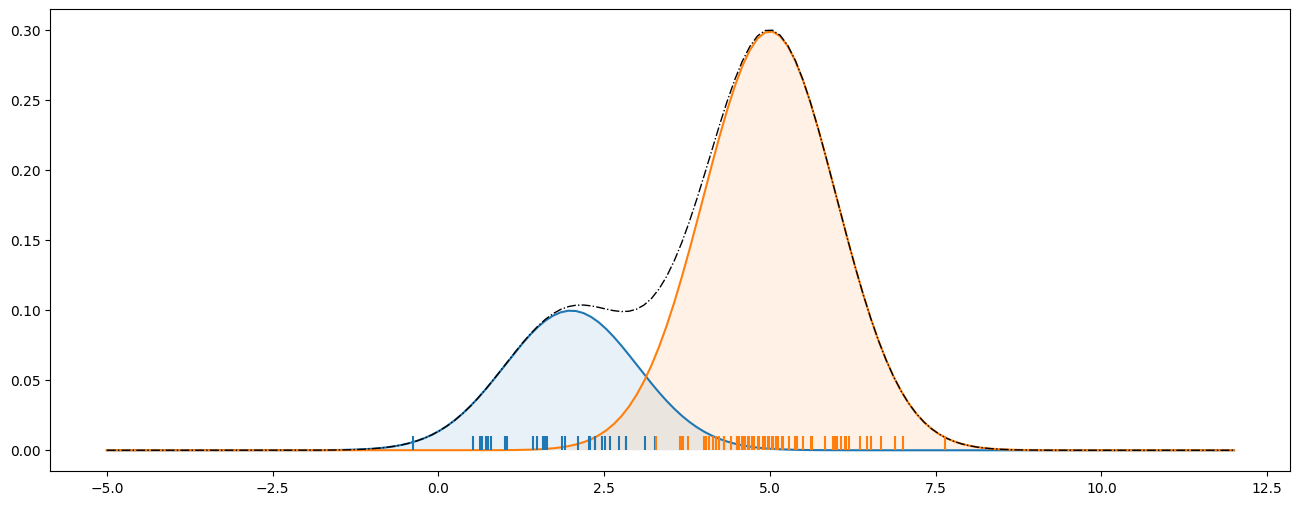

In [315]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
from scipy.special import psi, gamma, beta

np.random.seed(654)
# Draw samples from two Gaussian w.p. c_i ~ Bernoulli(p)
p = 0.75
ps = [1-p,p] #changed the order to match the one for pi
mus = [2, 5]
generative_m = np.array([stats.norm(mus[0], 1), stats.norm(mus[1], 1)])
c_i = stats.bernoulli(p).rvs(100)
x_i = np.array([g.rvs() for g in generative_m[c_i]])

# plot generated data and the latent distributions
x = np.linspace(-5, 12, 150)
plt.figure(figsize=(16, 6))
plt.plot(x, (1-p)*generative_m[0].pdf(x))
plt.plot(x, p*generative_m[1].pdf(x))
plt.plot(x, (1-p)*generative_m[0].pdf(x) + p*generative_m[1].pdf(x), lw=1, ls='-.', color='black')
plt.fill_betweenx((1-p)*generative_m[0].pdf(x), x, alpha=0.1)
plt.fill_betweenx(p*generative_m[1].pdf(x), x, alpha=0.1)
plt.vlines(x_i, 0, 0.01, color=np.array(['C0', 'C1'])[c_i])
plt.show()

General rule: try to avoid for loop and use broadcasting as much as possible. It makes your code more efficient and less prone to errors...

In [316]:
# Here are some examples using broadcasting:
z = np.random.normal(size=(2,5))
w = np.random.normal(size=2)

In [317]:
z.shape

(2, 5)

In [318]:
w.shape

(2,)

In [319]:
(w[:,np.newaxis]).shape

(2, 1)

In [320]:
(z*w[:,np.newaxis]).shape

(2, 5)

In [321]:
# do not do this:
res = np.zeros(2)
for i in range(2):
    res[i] = np.sum(z[i,:]*w[i])
res

array([ 0.02034857, -0.02583676])

In [322]:
# instead do this:
(z*w[:,np.newaxis]).sum(1)

array([ 0.02034857, -0.02583676])

In [323]:
(z*w[:,np.newaxis]).sum(0)

array([-0.79386331,  1.46279674, -0.72906848,  1.06800665, -1.01335978])

## 3.1 EM algorithm

Complete the code below.
$$
p_{ik}(\theta,x) = \frac{\pi_k(\theta) \exp\left( -\frac{1}{2}(x_i-\mu_k(\theta))^2\right)}{\sum_l \pi_l(\theta) \exp\left( -\frac{1}{2}(x_i-\mu_l(\theta))^2\right)}
$$

\begin{align*}
\pi_k(\theta_{t+1})  &= \frac{n_k(\theta_t,x)}{n(\theta_t,x)} &
\mu_k(\theta_{t+1})  &= \overline x_k(\theta_t,x)
\end{align*}

$$
\ell(\theta) = \sum_{i=1}^n\ln\left(\sum_{k=1}^K\pi_ke^{-(x_i-\mu_k)^2/2}\right) -\frac{n}{2}\ln(2\pi)
$$

In [324]:
class EM:
    def __init__(self, k):
        self.k = k       # number of clusters
        self.n = None
        self.mu = None   # (k,)
        self.p_ik = None # (k,n)
        self.pi = None   # (k,)
        self.lb = []     # to keep track of the lower bound
        self.x = None    # (n,) to store the data

    def expectation_step(self):
        self.p_ik = self.pi[:,None]*np.exp(-(self.x[None,:]-self.mu[:,None])**2/2)
        self.p_ik = self.p_ik/np.sum(self.p_ik,axis=0)[None,:]

    def maximization_step(self):
        n_k = np.sum(self.p_ik,axis=1)
        self.pi = n_k/np.sum(n_k) # update pi

        self.mu = self.p_ik@self.x # update mu
        self.mu = self.mu/n_k

    def lower_bound(self):
        lb = -self.n/2*np.log(2*np.pi)
        lb += np.sum(np.log(np.sum(self.pi[:,None]
                                   *np.exp(-(self.x[None,:]-self.mu[:,None])**2/2),axis=0)))
        return lb

    def fit(self, x):
        # once other methods are implemented, this should work fine!
        self.x = x
        self.n = x.shape[0]
        self.mu = np.random.uniform(x.min(), x.max(), size=self.k)
        self.p_ik = np.zeros((self.k, self.n))
        self.pi = np.ones(self.k) / self.k

        i = -1
        while (i<6 or ~np.isclose(self.lb[i-5], self.lb[i])):
            self.expectation_step()
            self.maximization_step()
            self.lb.append(self.lower_bound())
            i+=1
        return self.lb

In [325]:
em = EM(2)
em.n = x_i.shape[0]
em.x = np.array(x_i)
em.pi = np.array(ps)
em.mu = np.array(mus)
lb_th = em.lower_bound()
lb = em.fit(x_i)

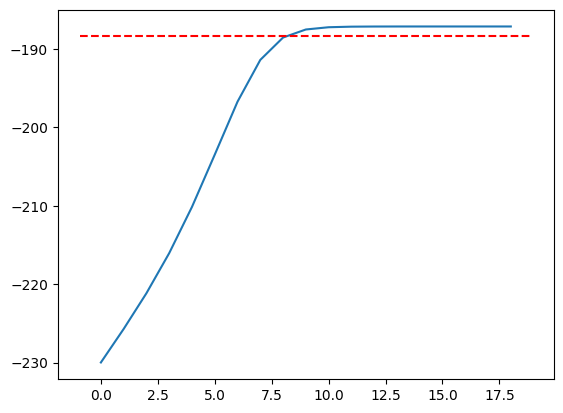

In [326]:
# plot the lower bound
plt.plot(lb)
plt.hlines(lb_th,*plt.xlim(),colors="r",linestyles="--")
plt.show()

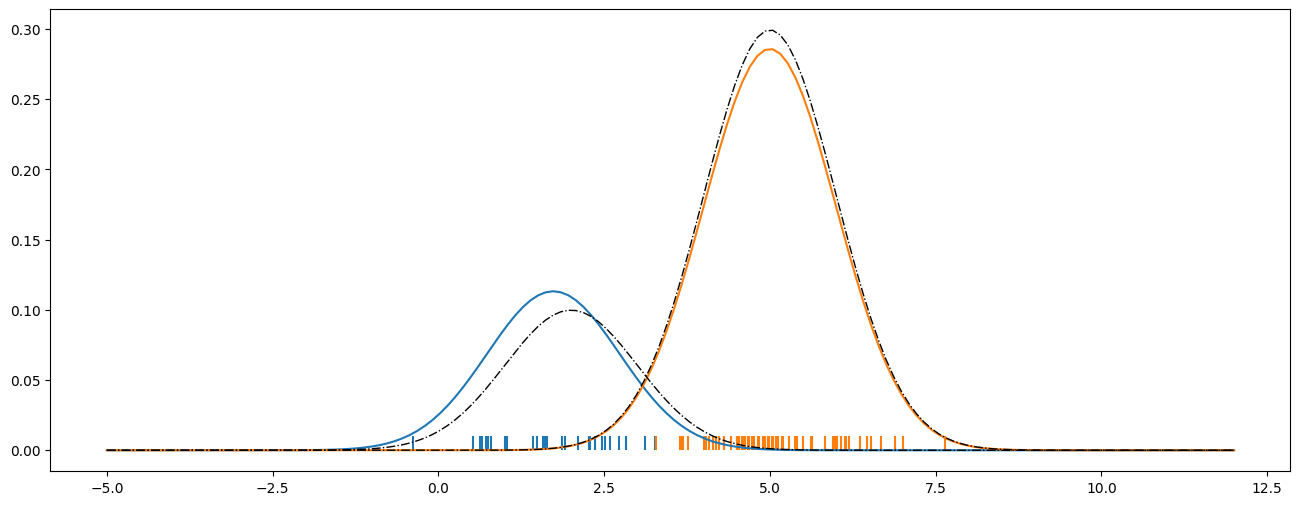

In [327]:
# this should display the fitted distribution
fitted_m = [stats.norm(mu, 1) for mu in em.mu]
fitted_p = em.pi

if fitted_p[0] > fitted_p[1]:
    fitted_p = fitted_p[::-1]
    fitted_m = fitted_m[::-1]

plt.figure(figsize=(16, 6))
plt.vlines(x_i, 0, 0.01, color=np.array(['C0', 'C1'])[c_i])
plt.plot(x, fitted_p[0]*fitted_m[0].pdf(x))
plt.plot(x, fitted_p[1]*fitted_m[1].pdf(x))
plt.plot(x, (1-p)*generative_m[0].pdf(x), color='black', lw=1, ls='-.')
plt.plot(x, p*generative_m[1].pdf(x), color='black', lw=1, ls='-.')
plt.show()

Slight overfit, since the red value is the one for the actual parameters and the $\ell$ overshoots. This is seen visually in the resulting pdf's.

## 3.2 VI algorithm

Complete the code below.

\begin{align*}
\phi_i(k) \to \frac{1}{Z_i} \exp\left( -\frac{1}{2}(v_k+(m_k-x_i)^2)+\psi(\beta_k)\right)\\
Z_i = \sum_{k=1}^K \exp\left( -\frac{1}{2}(v_k+(m_k-x_i)^2)+\psi(\beta_k)\right)
\end{align*}

\begin{align*}
m_k &\to \frac{\overline q_k \sigma^2}{\overline q_k\sigma^2+1}\overline x_k &
v_k &\to \frac{\sigma^2}{\overline q_k\sigma^2+1} &
\beta_k &\to \alpha+\overline q_k \\
\overline q_k &= \sum_{i=1}^n \phi_i(k) &
\overline x_k &= \frac{1}{\overline q_k}\sum_{i=1}^n x_i \phi_i(k)
\end{align*}

\begin{align*}
H(q(\mu))  &= \frac{K}{2}+\sum_{k=1}^K\frac{\ln(2\pi v_k)}{2} \\
H(q(\pi))  &= \ln \Beta(\beta)+(\beta_0-K)\psi(\beta_0)-\sum_{k=1}^K(\beta_k-1)\psi(\beta_k) \\
H(q(c))  &= -\sum_{i=1}^n\sum_{k=1}^K\phi_i(k)\ln\phi_i(k)\\
A  &= \ln C(\alpha)-K\left(\frac{\ln(2\pi \sigma^2)}{2}+(\alpha-1)\psi(\beta_0)\right)-\sum_{k=1}^K\frac{m_k^2+v_k}{2\sigma^2}-(\alpha-1)\psi(\beta_k)\\
B  &=  -n\left(\frac{\ln(2\pi)}{2}+\psi(\beta_0)\right)+\sum_{k=1}^K \overline q_k\left(-\frac{m_k^2-2m_k\overline x_k+\overline {x^2}_k+v_k}{2}+\psi(\beta_k)\right)
\end{align*}

\begin{align*}
\overline q_k &= \sum_{i=1}^n \phi_i(k) &
\overline x_k &= \frac{1}{\overline q_k}\sum_{i=1}^n x_i \phi_i(k) &
\overline{x^2}_k &= \frac{1}{\overline q_k}\sum_{i=1}^n x_i^2 \phi_i(k)
\end{align*}

In [328]:
# these functions should be useful to compute the ELBO
def my_log_beta(b):
    return np.sum(np.log(gamma(b)))-np.log(gamma(np.sum(b)))

def my_C(a,k):
    return gamma(k*a)/np.float_power(gamma(a),k)

In [329]:
class VI:
    def __init__(self,k, prec=0.0001, alpha=0.0001):
        self.k = k
        self.n = None 
        self.means = None # (k,)
        self.vars = None # (k,)
        self.phi = None # (k,n)
        self.beta = None # (k,)
        #self.rho = None # (k,)
        #self.norm_rho = 0 # see definition in function fit
        self.prec = prec # precision for the Gaussian prior
        self.alpha= alpha # alpha for the Dirichlet prior
        self.lb = [] # to keep track of the lower bound
        self.x = None # to store the data
        
    def update_phi_rho(self):
        self.phi = np.exp(-(self.vars[:,None]+(self.means[:,None]-self.x[None,:])**2)/2
                          +psi(self.beta[:,None]))
        self.phi = self.phi/np.sum(self.phi,axis=0)[None,:]

    def update_mu_pi(self):
        q_k = np.sum(self.phi,axis=1)
        x_k = (self.phi@self.x)/q_k
        self.means = x_k/(1+self.prec/q_k)
        self.vars = 1/(q_k+self.prec)
        self.beta = self.alpha+q_k
    
    def lower_bound(self):
        lb  = self.k/2+0.5*np.sum(np.log(2*math.pi*self.vars))
        beta0 = np.sum(self.beta)
        lb += (beta0-self.k)*psi(beta0)\
              -np.sum((self.beta-1)*psi(self.beta))\
              +my_log_beta(self.beta) #+np.log(beta(*self.beta))
        lb += -np.sum(np.log(self.phi)*self.phi) 
        lb += np.log(my_C(self.alpha,self.k))\
              -self.k*(np.log(2*np.pi/self.prec)/2+(self.alpha-1)*psi(beta0))\
              -np.sum((self.means**2+self.vars)/2*self.prec-(self.alpha-1)*psi(self.beta))
        q_k = np.sum(self.phi,axis=1)
        x_k = (self.phi@self.x)/q_k
        x2_k = (self.phi@self.x**2)/q_k
        lb += -self.n*(np.log(2*np.pi)/2+psi(beta0))\
              +q_k@(psi(self.beta)-(self.means**2-2*x_k*self.means+x2_k+self.vars)/2)
        return lb
    
    def fit(self, x):
         # once other methods are implemented, this should work fine!
        self.n = x.shape[0]
        self.x = x
        self.means = np.random.uniform(x.min(), x.max(), size=self.k)
        self.vars = np.ones(self.k)
        self.phi = np.random.uniform(0,1,size=((self.k,self.n)))
        self.phi /= self.phi.sum(0)
        self.beta = (self.n/self.k+self.alpha)*np.ones(self.k)
        #self.norm_rho = np.exp(-psi(self.k*self.alpha+self.n))
        
        i = -1
        while ( i<6 or ~np.isclose(self.lb[i-5], self.lb[i])):
        #for j in range(20):
            self.update_phi_rho()
            self.update_mu_pi()
            self.lb.append(self.lower_bound())
            i +=1
        return self.lb

In [330]:
vi = VI(2)
lb_vi = vi.fit(x_i)

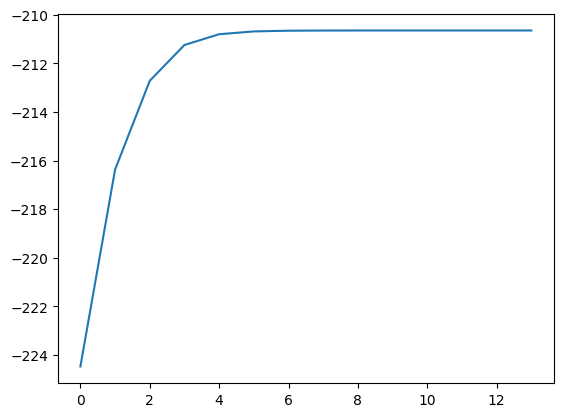

In [331]:
#plot the ELBO
plt.plot(lb_vi)
#plt.hlines(lb_th,*plt.xlim(),colors="r",linestyles="--")
plt.show()

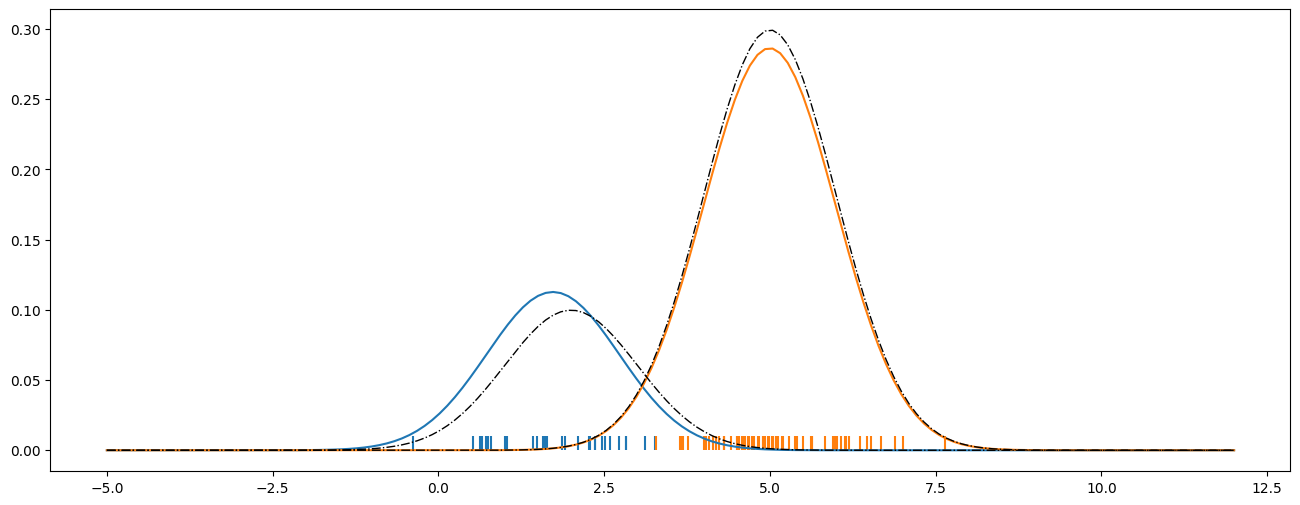

In [332]:
# this should display the fitted distribution
fitted_m_vi = [stats.norm(mu, 1) for mu in vi.means]
fitted_p_vi = vi.phi.mean(axis=1)

if fitted_p_vi[0] > fitted_p_vi[1]:
    fitted_p_vi = fitted_p_vi[::-1]
    fitted_m_vi = fitted_m_vi[::-1]
    
plt.figure(figsize=(16, 6))
plt.vlines(x_i, 0, 0.01, color=np.array(['C0', 'C1'])[c_i])
plt.plot(x, fitted_p_vi[0]*fitted_m_vi[0].pdf(x))
plt.plot(x, fitted_p_vi[1]*fitted_m_vi[1].pdf(x))#,"C0")
plt.plot(x, (1-p)*generative_m[0].pdf(x), color='black', lw=1, ls='-.')
plt.plot(x, p*generative_m[1].pdf(x), color='black', lw=1, ls='-.')
plt.show()

This time, the theoritical value is systematically underestimated, resulting in underfitting. This is surprising because the two algorithms were proven to be equivalent in the case of uniformative priors. In fact, there is no visula distinction between the output of the two methods. There is probably a forgotten term in the computation of the ELBO.